<a href="https://colab.research.google.com/github/justynamatejkowska/wizualizacja_py/blob/main/Wizualizacja_py_Matejkowska_Lewandowska.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projekt zaliczeniowy
## **Wizualizacja danych sprzedażowych sieci sklepów *Drogeria* w języku Python tekst**
##### Autorzy: Katarzyna Lewandowska, Justyna Matejkowska

# Przygotowanie środowiska

Import pakietów

In [ ]:
import csv
import pandas as pd
import requests
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

Wczytanie danych

In [ ]:
# przykladowy sposb odczytu z pliku lezacego pod sciezka /2021-selected-rates.csv
url = 'https://raw.githubusercontent.com/justynamatejkowska/wizualizacja_py/main/d_shops.csv'
response = requests.get(url)
open("/d_shops.csv", "wb").write(response.content)

shops = pd.read_csv('/d_shops.csv')

Wczytanie tabeli z danych

In [ ]:
shops = pd.read_csv('/d_shops.csv')

Deklaracja kolorów

In [ ]:
COLOR_1 = '#a1c9f4' 
COLOR_2 = '#8de5a1' 
COLOR_3 = '#ff9f9b'
COLOR_4 = '#d0bbff'
COLOR_5 = '#debb9b'
COLOR_6 = '#fab0e4'
COLOR_7 = '#cfcfcf'
COLOR_8 = '#fffea3'
COLOR_9 = '#b9f2f0'


# *Drogeria* vs konkurencja


Przygotowanie danych do wykresu 1.

In [ ]:
shops
values = ['sprzedaz','liczba_klientow','sklep_konkurencja']
top_5 = shops.pivot_table(index = 'sklep_id', values = values, aggfunc='sum').nlargest(5,'sprzedaz')

top_5.rename(columns={'sprzedaz': 'suma_sprzedazy', 'liczba_klientow':'klienci', 'sklep_konkurencja': 'konkurencja'}, inplace=False)

,klienci,konkurencja,suma_sprzedazy
sklep_id,,,
42,337339,105850,3132357
25,419902,156950,3004443
4,405758,226300,2971989
35,222661,2795900,2946316
27,325933,21900,2891329


Wykres 1. - porównanie 5 sklepów *Drogeria*, które charakteryzują się się największym przychodem wśród wszystkich sklepów *Drogeria*

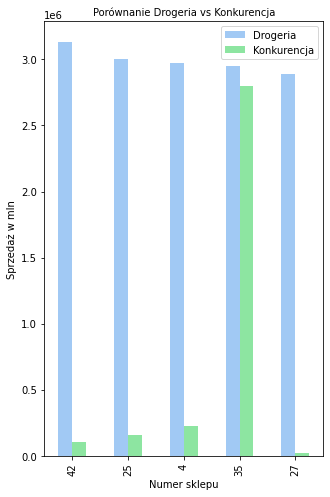

In [ ]:
y=['sprzedaz','sklep_konkurencja']
color=[COLOR_1, COLOR_2 ]

plt.rcParams["figure.figsize"] = (5,8) #zmiana rozmiaru
fig1 = top_5.plot.bar(y=y, color=color) #stworzenie wykresu

fig1.set_ylabel('Sprzedaż w mln', color='black', fontsize=10)
fig1.set_xlabel('Numer sklepu',color='black', fontsize=10)
fig1.set_title('Porównanie Drogeria vs Konkurencja',color='black', fontsize=10)
fig1.legend(['Drogeria','Konkurencja'], loc = 0)
plt.show()

#Sprzedaż sklepu numer 42

 Przygotowanie danych do wykresu 2.

In [ ]:
shops1 = shops
shops1.data = pd.to_datetime(shops.data)
shops1.data = shops.data.dt.strftime('%Y-%m')

shops1_piv = pd.pivot_table(shops1, index=['sklep_id'], values = 'sprzedaz', aggfunc='sum',columns=['data'])
shops1

,sklep_id,dzien_tyg,data,sprzedaz,liczba_klientow,czy_otwarty,czy_promocja,czy_swieto,czy_swieto_szkolne,sklep_typ,sklep_asort,sklep_konkurencja
0,1,3,2021-12,2605,327,Tak,Nie,Nie,Tak,c,Podstawowy,1270
1,2,3,2021-12,2269,252,Tak,Nie,Nie,Tak,a,Podstawowy,570
2,3,3,2021-12,3804,408,Tak,Nie,Nie,Tak,a,Podstawowy,14130
3,4,3,2021-12,10152,1311,Tak,Nie,Nie,Tak,c,Rozszerzony,620
4,5,3,2021-12,1830,217,Tak,Nie,Nie,Tak,a,Podstawowy,29910
...,...,...,...,...,...,...,...,...,...,...,...,...
16957,46,3,2021-01,0,0,Nie,Nie,Narodowe,Tak,c,Podstawowy,1200
16958,47,3,2021-01,0,0,Nie,Nie,Narodowe,Tak,a,Rozszerzony,270
16959,48,3,2021-01,0,0,Nie,Nie,Narodowe,Tak,a,Podstawowy,1060
16960,49,3,2021-01,0,0,Nie,Nie,Narodowe,Tak,d,Rozszerzony,18010


Wykres 2. - sprzedaż sklepu *Drogeria* nr 42

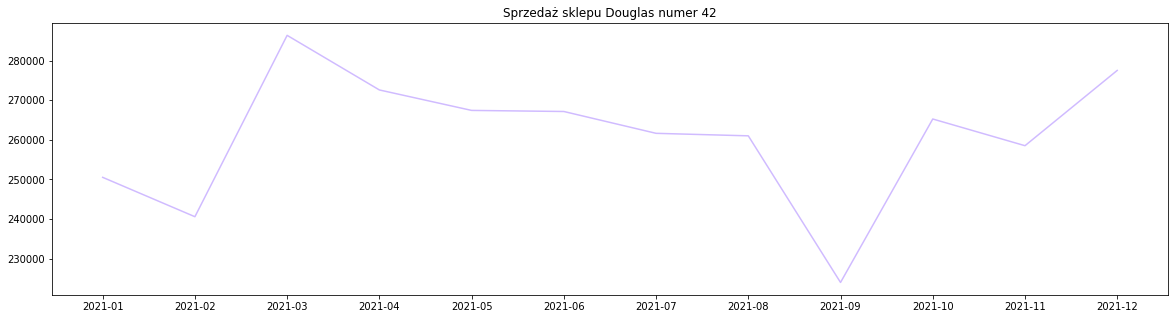

In [ ]:
x2 = shops1_piv.loc[42,:]

df2= pd.DataFrame(x2)

def wykres_liniowy(tabela, color, tytul):
  figura = plt.figure(figsize=(20,5))
  ax = plt.axes()
  fig2 = plt.plot(tabela, color)
  plt.title(tytul)
  return plt.show()

wykres_liniowy(df2, COLOR_4, 'Sprzedaż sklepu Douglas numer 42')

#brak tytulu y osi 


#Promocja vs sprzedaż

Przygotowanie danych do wykresu 3.

In [ ]:
shops3 = shops[(shops.sklep_id == 42 ) & (shops.czy_otwarty == 'Tak') ]

Wykres 3. - sprzedaż w ujęciu tygodniowym w zależności od wprowadzenia promocji

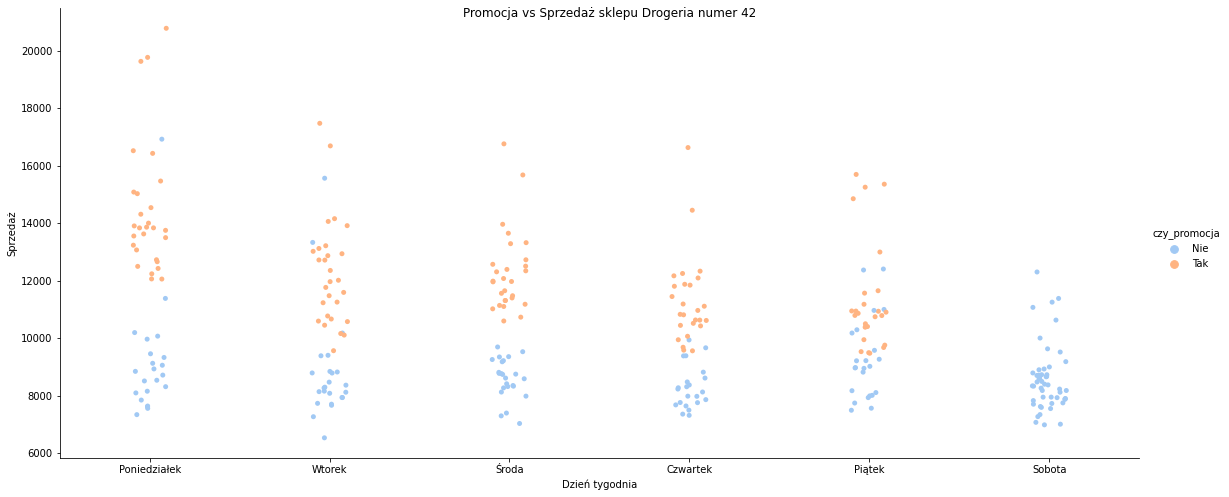

In [ ]:
with sns.color_palette("pastel"):
  fig3 = sns.catplot(data = shops3, x = 'dzien_tyg', y = 'sprzedaz', hue = 'czy_promocja', height = 7, aspect =2.3)
  fig3.set_xticklabels(['Poniedziałek','Wtorek','Środa','Czwartek','Piątek','Sobota'])
  fig3.set_axis_labels('Dzień tygodnia','Sprzedaż')
  fig3.set_titles(template ='Wpływ promacji na sprzedaż wg dnia tygodnia')
  fig3.fig.suptitle('Promocja vs Sprzedaż sklepu Drogeria numer 42')
plt.show()


#Rozkład sprzedaży i klientów w sklepach *Drogeria*

Przygotowanie danych do wykresu 4.

In [ ]:
shops41 = shops[(shops.sklep_id == 42 ) & (shops.czy_otwarty == 'Tak') ]
shops42 = shops[(shops.sklep_id == 35 ) & (shops.czy_otwarty == 'Tak') ]
shops43 = shops[(shops.sklep_id == 25 ) & (shops.czy_otwarty == 'Tak') ]
shops44 = shops[(shops.sklep_id == 4 ) & (shops.czy_otwarty == 'Tak') ]
shops45 = shops[(shops.sklep_id == 27 ) & (shops.czy_otwarty == 'Tak') ]

shops49 = shops41.append(shops42)
shops46 = shops49.append(shops43)
shops47 = shops46.append(shops44)
shops48 = shops47.append(shops45)

shops4 = shops48

Wykres 4. - rozkład sprzedaży, liczby klientów w 5 najbardziej dochodowych sklepach w 2021 roku

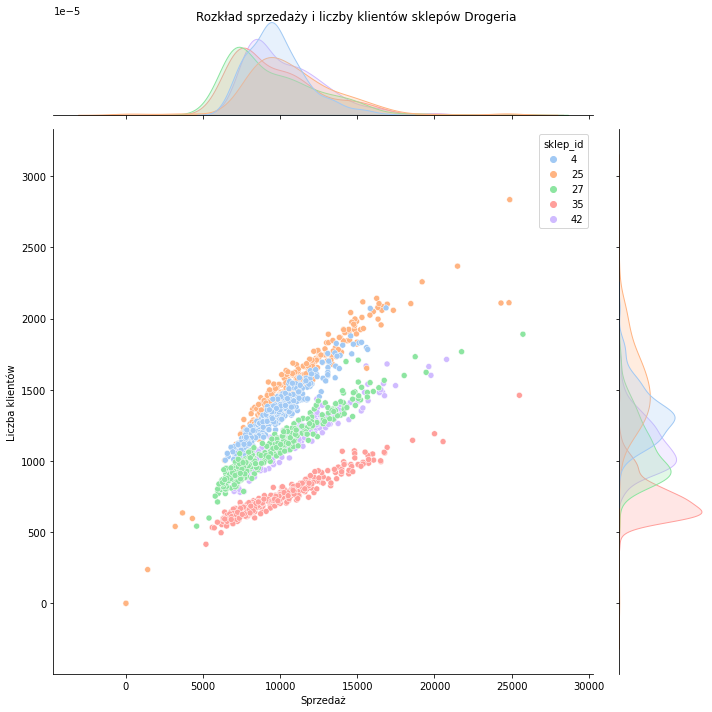

In [ ]:
p4 = sns.jointplot(data = shops4, x="sprzedaz", y="liczba_klientow", hue="sklep_id", height = 10, palette = "pastel")
p4.fig.suptitle('Rozkład sprzedaży i liczby klientów sklepów Drogeria')
p4.set_axis_labels('Sprzedaż','Liczba klientów')
p4.fig.tight_layout()

plt.show()

# Sprzedaż vs święta

Przygotowanie danych dla wykresu 5.

In [ ]:
shops5 = shops

shops5['czy_swieto'] = shops5['czy_swieto'].replace(['Narodowe'], 'Tak')
shops5['czy_swieto'] = shops5['czy_swieto'].replace(['Wielkanoc'], 'Tak')
shops5['czy_swieto'] = shops5['czy_swieto'].replace(['Boże Narodzenie'], 'Tak')

df5 = pd.pivot_table(shops5, index = ['sklep_id'], columns = ['czy_swieto'], values = ['sprzedaz'], aggfunc='sum')

df5.loc[:,'Suma'] = df5.sum(numeric_only = True, axis = 1)
df5.sort_values(['Suma'], ascending = False, inplace=True)

Wykres 5 - wpływ sprzedaży w święta na sprzedaż sklepów *Drogeria* ogółem

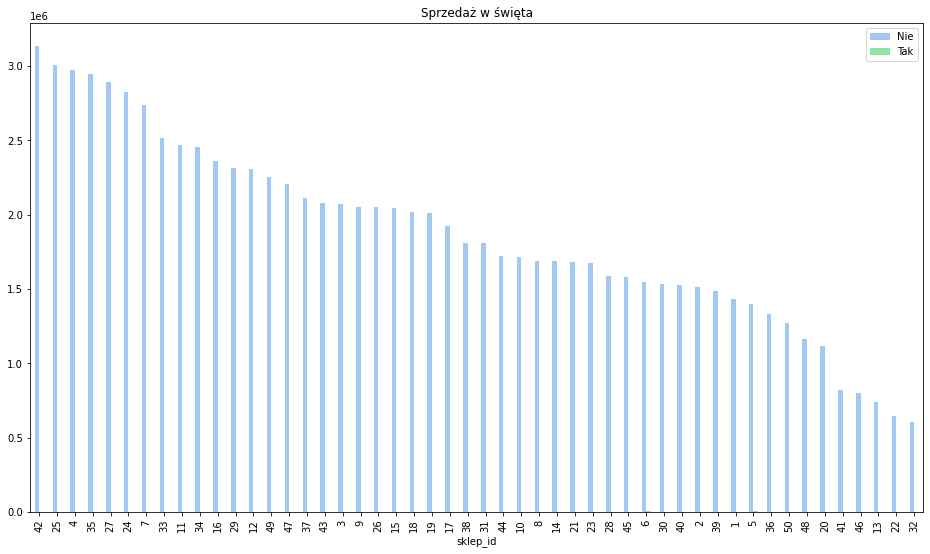

In [ ]:
plt.rcParams["figure.figsize"] = (16,9)
y5 = ['sprzedaz']
df5.plot.bar(y=y5, color=color, legend=True) #stworzenie wykresu

L = plt.legend()
L.get_texts()[0].set_text('Nie')
L.get_texts()[1].set_text('Tak')
plt.title('Sprzedaż w święta')


plt.show()

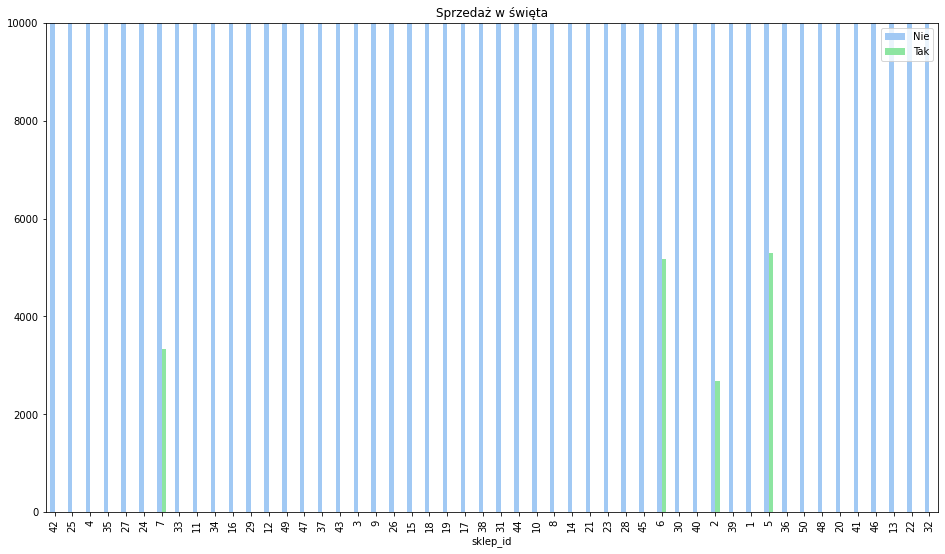

In [ ]:
plt.rcParams["figure.figsize"] = (16,9)
y5 = ['sprzedaz']
df5.plot.bar(y=y5, color=color) #stworzenie wykresu
plt.ylim(0, 10000)

L = plt.legend()
L.get_texts()[0].set_text('Nie')
L.get_texts()[1].set_text('Tak')
plt.title('Sprzedaż w święta')

plt.show()
#dodać po lewej inna skalę obraz 42 najwiecej a wcale nie sprzedaje w swieta

In [ ]:
#NIE DZIAŁA W5 wer nie dokończona
shops5.sns.set_context('paper')
f, ax = plt.subplots(figsize = (6,15))
dataset5 = sns.load_dataset('car_crashes')

sns.set_color_codes('pastel')
sns.barplot(data= df5, x = 'Suma', y = None, label = 'Total', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(data = df5, x = 'sprzedaz' , y = None, label = 'Zamknięty', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)
plt.show()

In [ ]:
#NIE DZIAŁA

#6 największa liczba klientów czy pokrywa się ze sprzedażą - jakiś easy 6?

#sprzedaż najlepszego sklepu w czasie
shops6 = shops
shops6.data = pd.to_datetime(shops.data)
shops6.data = shops.data.dt.strftime('%Y-%m')

value6 =['sprzedaz', 'liczba_klientow']

#sprzedaż sklepów w ujęciu miesięcznym
shops6 = pd.pivot_table(shops1, index=['sklep_id'], values = value6, aggfunc='sum',columns=['data'])
shops6

# Sprzedaż vs dzień tygodnia

Przygotowanie danych do wykresu 7.

In [103]:
shops7 = shops3

shops7 = shops[(shops.sklep_id == 42 ) & (shops.czy_otwarty == 'Tak') ]
df7 = pd.pivot_table(shops7, index = ['sklep_id'], columns = ['dzien_tyg'], values = ['sprzedaz'], aggfunc='mean')
df7.transpose()

sklep_id                      42
         dzien_tyg              
sprzedaz 1          12122.260000
         2          10679.019231
         3          10580.423077
         4           9924.958333
         5          10353.816327
         6           8568.980392

Wykres 7. - średnia sprzedaż dla sklepu *Drogeria* numer 42 wg dni tygodnia

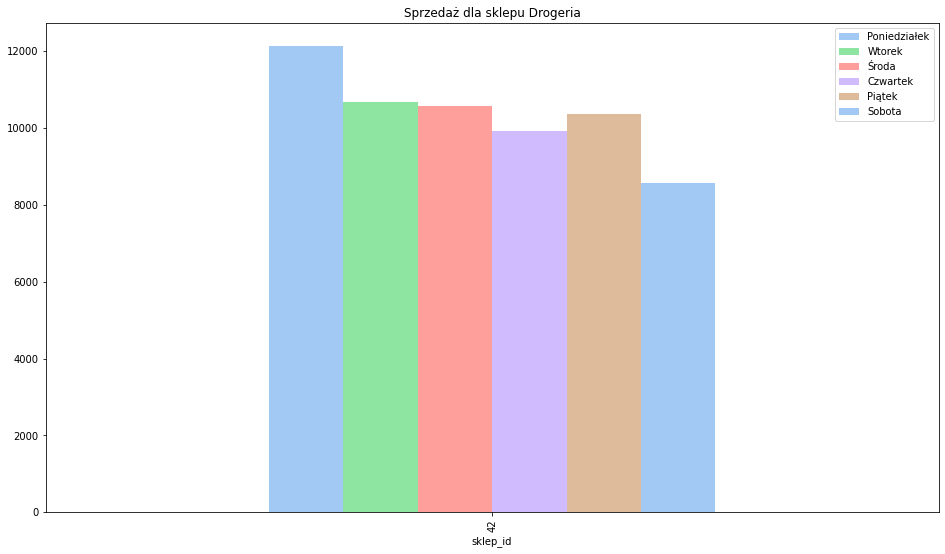

In [104]:
plt.rcParams["figure.figsize"] = (16,9)
fig7 = df7.plot.bar(y='sprzedaz', color = [COLOR_1, COLOR_2, COLOR_3, COLOR_4, COLOR_5])
plt.title('Sprzedaż dla sklepu Drogeria')
plt.xlabel = ('Numer sklepu')
plt.ylabel  = ('Sprzedaż')

L = plt.legend()
L.get_texts()[0].set_text('Poniedziałek')
L.get_texts()[1].set_text('Wtorek')
L.get_texts()[2].set_text('Środa')
L.get_texts()[3].set_text('Czwartek')
L.get_texts()[4].set_text('Piątek')
L.get_texts()[5].set_text('Sobota')